In [123]:
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
%matplotlib inline

In [125]:
#read the csv datafile
dataset = pd.read_csv('/content/drive/MyDrive/heart_disease_data.csv', sep=",", header='infer')
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


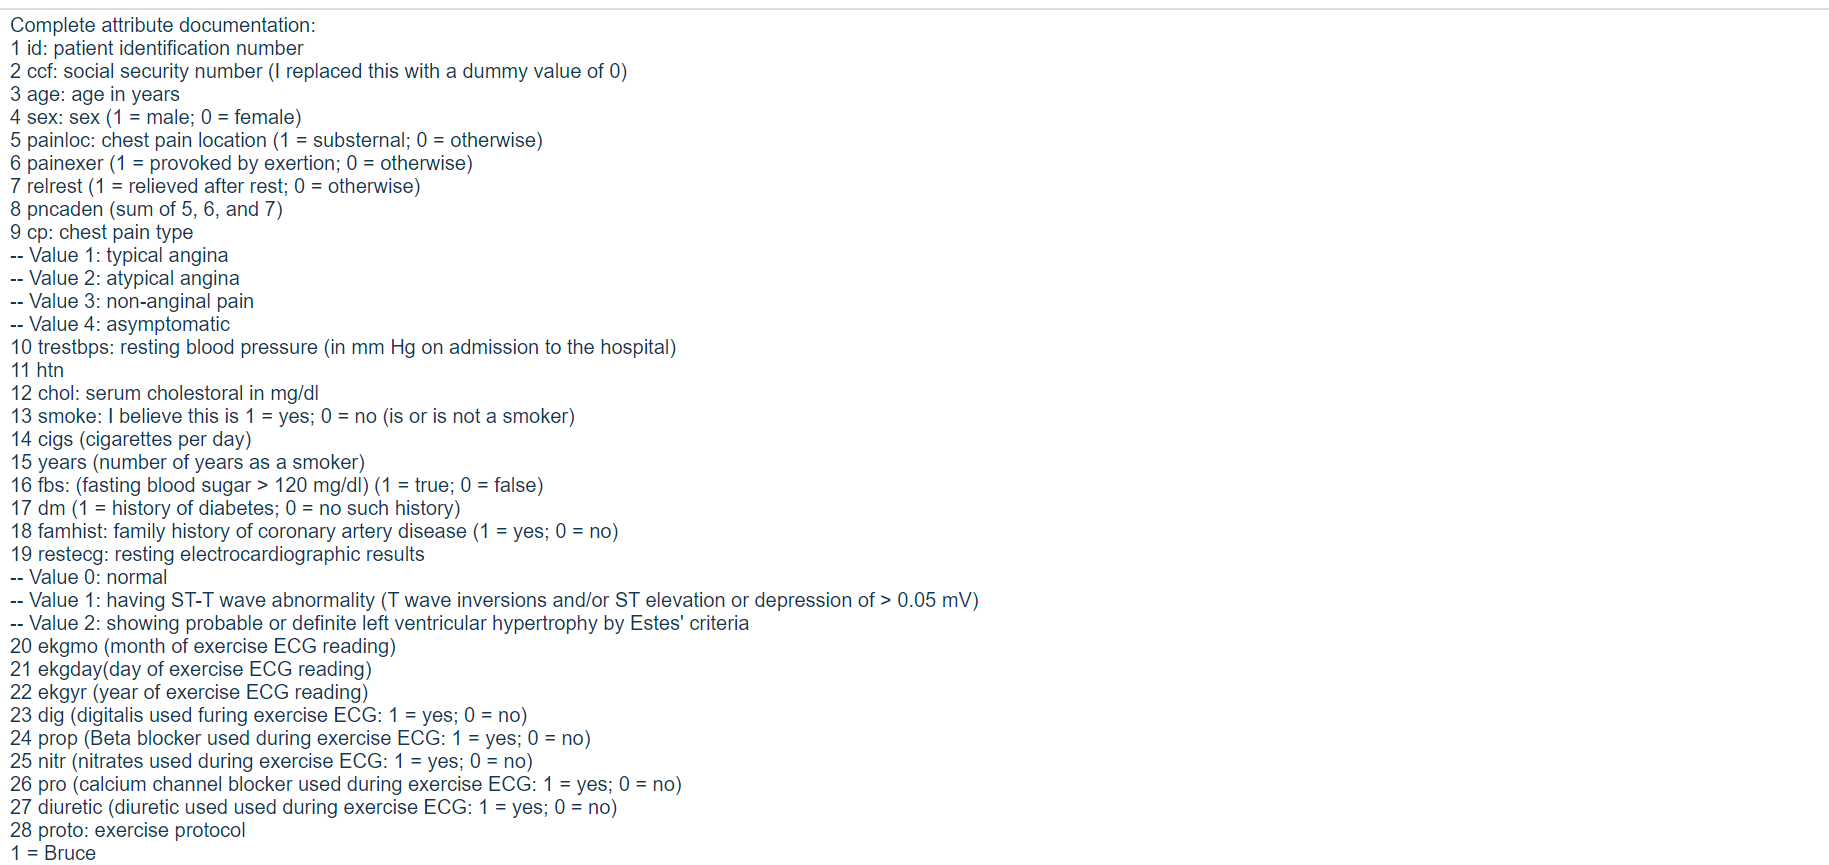

In [126]:
# get some information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [127]:
#to check the null values in dataset
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Feature engineering**


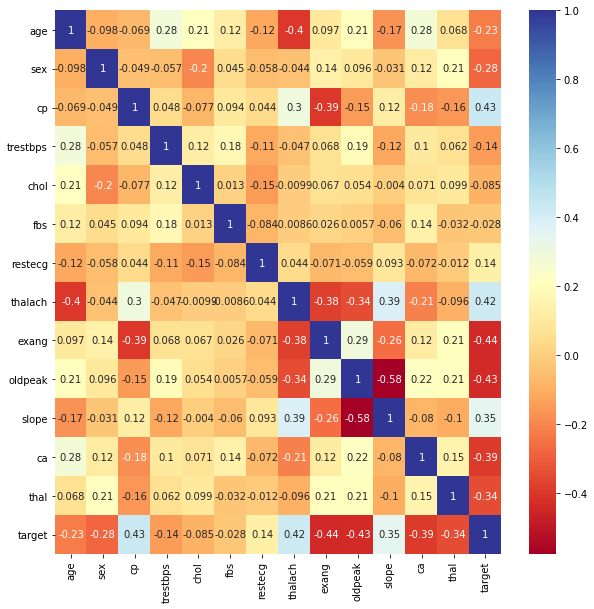

In [128]:
# to get the correlation with each features
corrmat = dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))

# plot heatmap
g = sns.heatmap(data=dataset.corr(), cmap='RdYlBu', annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cda1eaf50>,
      dtype=object)

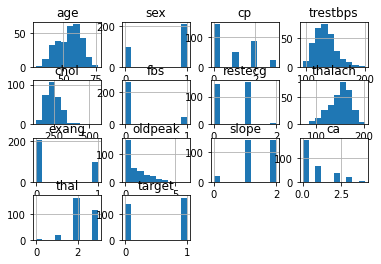

In [129]:
dataset.hist()

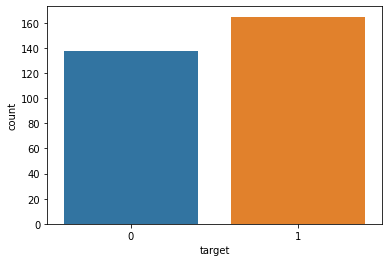

In [130]:
sns.countplot(x='target', data=dataset)

Data Processing

In [131]:
dataset1 = pd.get_dummies(data=dataset ,columns =['sex', 'cp', 'fbs','restecg','exang', 'slope','ca',	'thal'])
dataset1


,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1.2,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [132]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset1[columns_to_scale] =scale.fit_transform(dataset1[columns_to_scale])


In [133]:
dataset1

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,cp_2,cp_3,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1
299,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1
300,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
301,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1


In [134]:
y = dataset1['target']
x = dataset1.drop(labels='target', axis=1)

In [135]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state =32 )

In [136]:
print('shape of training feature sample:', x_train.shape)
print('shape of training output', y_train.shape)
print('shape of test feature sample', x_test.shape)
print('shape of test output', y_test.shape)

shape of training feature sample: (242, 30)
shape of training output (242,)
shape of test feature sample (61, 30)
shape of test output (61,)


##Random Forest Classifier


In [137]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
y_predict = RFclassifier.predict(x_test)
y_predict


array([0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1])

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [140]:
# View accuracy score
accuracy_score(y_test, y_predict)

0.8360655737704918

In [141]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_predict)

array([[23,  7],
       [ 3, 28]])

In [142]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



## Logistic regression


In [143]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression()
LRclassifier.fit(X=x_train, y=y_train,sample_weight=True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [144]:
y_predict2 = LRclassifier.predict(x_test)

In [145]:
accuracy_score(y_true=y_test, y_pred=y_predict2)

0.8688524590163934

In [146]:
confusion_matrix(y_true=y_test, y_pred=y_predict2)

array([[24,  6],
       [ 2, 29]])

## Support Vector Machine (SVM)

In [147]:
# linear svm classifier with rbf kernel
from sklearn.svm import SVC
svm_classfier = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale', 
                    coef0=0.0, shrinking=True, probability=False, tol=0.001, 
                    cache_size=200, class_weight=None, verbose=False, max_iter=-1,
                    decision_function_shape='ovr', break_ties=False, random_state=None)
svm_classfier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [148]:
y_predict3 = svm_classfier.predict(x_test)
accuracy_score(y_test, y_predict3)

0.8524590163934426

In [149]:
confusion_matrix(y_test,y_predict3)

array([[24,  6],
       [ 3, 28]])

In [150]:
#svm with linear kernel
from sklearn.svm import LinearSVC
svm_Lclassifier = LinearSVC()


In [151]:
svm_Lclassifier.fit(x_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [152]:
y_predict4 = svm_Lclassifier.predict(x_test)
accuracy_score(y_test,y_predict4)


0.8360655737704918

## Naive Baayesian classifier


In [153]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [154]:
y_predict7=NBclassifier.predict(x_test)

In [155]:
accuracy_score(y_test, y_predict7)

0.8032786885245902

## Decision Tree classifier 

In [156]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier =DecisionTreeClassifier()

In [157]:
DTclassifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [158]:
y_pred = DTclassifier.predict(x_test)
accuracy_score(y_test, y_pred)

0.6229508196721312